# Gromacs - HECBioSim Benchmarks

Results from the [Gromacs](http://www.gromacs.org/) molecular dynamics code on 3x [HECBioSim](http://www.hecbiosim.ac.uk/benchmarks) benchmarks:
- 61K atom system - 1WDN Glutamine-Binding Protein
- 1.4M atom system - A Pair of hEGFR Dimers of 1IVO and 1NQL
- 3M atom system - A Pair of hEGFR tetramers of 1IVO and 1NQL

In [1]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, HTML

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../reframe', '..')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

# Performance vs number of nodes

The plots below are for the most-recent test on each system/partition/environment combination. They plot the "ns_per_day" performance vs. the number of nodes used for each run. Higher values are better performance.

Each test uses 1 task per (hardware) core.


Gromacs_61k_*: ns_per_day


case,alaska-ib-openmpi4-ucx-gromacs,alaska-roce-openmpi4-ucx-gromacs
n_nodes,,
1,29.664,29.666
2,49.851,49.914
4,75.233,74.819
8,63.445,69.490
16,86.565,65.114



Gromacs_1400k_*: ns_per_day


case,alaska-ib-openmpi4-ucx-gromacs,alaska-roce-openmpi4-ucx-gromacs
n_nodes,,
1,1.504,1.507
2,2.908,2.926
4,5.529,5.442
8,8.283,7.622
16,12.418,11.985



Gromacs_3000k_*: ns_per_day


case,alaska-ib-openmpi4-ucx-gromacs,alaska-roce-openmpi4-ucx-gromacs
n_nodes,,
1,0.645,0.646
2,1.280,1.284
4,2.525,2.529
8,4.719,4.641
16,7.155,6.527


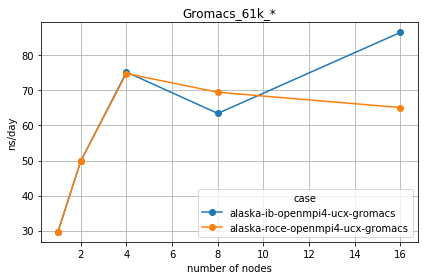

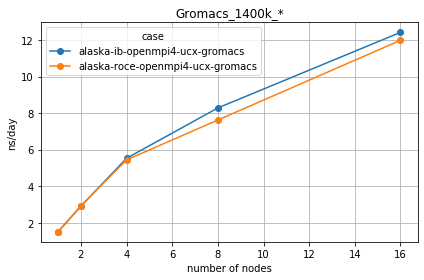

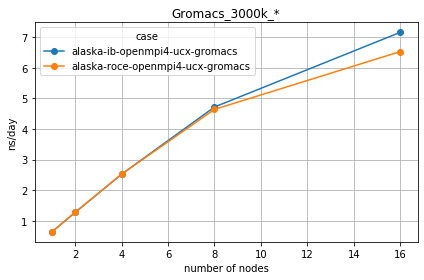

In [11]:
for test in ['Gromacs_61k_*', 'Gromacs_1400k_*', 'Gromacs_3000k_*']:
    
    # load perf records:
    perf_records = modules.utils.load_perf_logs('../perflogs', test, '.log')
    
    # calculate number of nodes:
    perf_records['n_nodes'] = [int(tn.rsplit('_')[-1]) for tn in perf_records['testname']]
    
    # plot/tabulate:
    perf_var = 'ns_per_day'
    table = modules.plots.tabulate_last_perf_vs(perf_records, 'n_nodes', perf_var)
    ax = table.plot(grid=True, style='o-')
    ax.set_xlabel('number of nodes')
    ax.set_ylabel('ns/day')
    ax.set_title(test)
    plt.tight_layout()
    print()
    print('%s: %s' % (test, perf_var))
    display(HTML(table.to_html()))
